In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ryans-laptop-inventory-and-specifications/ryans_laptop_inventory.csv


In [4]:
df=pd.read_csv("/kaggle/input/ryans-laptop-inventory-and-specifications/ryans_laptop_inventory.csv")
pd.set_option("display.max_columns",None)

In [5]:
df.sample(3)

,Link,Brand,Model,Laptop Series,Part No,Processor Brand,Processor Type,Processor Model,Processor Core,RAM,RAM Type,HDD RPM,Installed SSD Type,Graphics Chipset,Graphics Memory Accessibility,Graphics Memory,Display Size (Inch),Display Type,Display Resolution,Touch Screen,Optical Drive,HDMI Port,LAN,Finger Print Sensor,Operating System,Color,Weight (Kg),Power Adapter,Warranty,Country Of Origin
158,https://www.ryans.com/avita-liber-v14-intel-co...,Avita,Avita LIBER V14,LIBER,NS14A9BDF565N-PAE,Intel,Not Found,Core i5 1135G7,4,8GB,LPDDR4x,No HDD,NVMe PCIe,Intel Iris Xe Graphics,Integrated,Shared,14,FHD LED Display,1920x1080,No,No,1,No,Yes,Win-10 Home,Snowflakes on Azure Blue,1.30 kg,Not Found,2 Year,Hong Kong
21,https://www.ryans.com/dell-inspiron-15-3520-in...,Dell,Dell Inspiron 15 3520,Inspiron,WARMLKN15ADL23051004PLASPP-2Y,Intel,Not Found,Core i3 1215U,6,8GB,DDR4,No HDD,NVMe PCIe,Intel UHD Graphics,Integrated,Shared,15.6,Full HD Display,1920x1080,No,No,1,No,No,Win-11 Home,Platinum Silver,1.65 kg,65 Watt,2 Year,USA
821,https://www.ryans.com/dell-g15-5530-intel-core...,Dell,Dell G15 5530,G Series,GN55309K5K0001OGDDD,Intel,Not Found,Core i5 13450HX,10,16GB,DDR5,No HDD,NVMe PCle,Nvidia RTX 3050 Graphics,Dedicated,6GB,15.6,FHD LED Display,1920x1080,No,No,1,Yes,No,Win-11 Home,Platinum Silver,2.81 kg,240W,2 Year,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Link                           1170 non-null   object
 1   Brand                          1170 non-null   object
 2   Model                          1170 non-null   object
 3   Laptop Series                  1170 non-null   object
 4   Part No                        1170 non-null   object
 5   Processor Brand                1170 non-null   object
 6   Processor Type                 1170 non-null   object
 7   Processor Model                1170 non-null   object
 8   Processor Core                 1170 non-null   object
 9   RAM                            1170 non-null   object
 10  RAM Type                       1170 non-null   object
 11  HDD RPM                        1170 non-null   object
 12  Installed SSD Type             1170 non-null   object
 13  Gra

In [7]:
#drop a row with all columns has "Failed to fetch content" 
df=df.drop(df[df["RAM"]=="Failed to fetch content"].index[0])

In [8]:
dff=df.drop(columns=['Link','Model','Part No'])

In [9]:
#printing all columns unique values
for i in dff.columns:
    print(i)
    print(dff[i].unique())
    print("\n")

Brand
['Lenovo' 'Asus' 'Chuwi' 'HP' 'Infinix' 'Acer' 'Dell' 'Hp' 'Huawei' 'MSI'
 'Gigabyte' 'Avita' 'Apple' 'Microsoft']


Laptop Series
['IdeaPad' 'ExpertBook' 'MiniBook' '15s' 'INBOOK' 'Aspire' 'Inspiron' '15'
 'Swift' 'MateBook' 'Modern' 'Gaming' 'HeroBook' 'GemiBook' 'Vivobook'
 'ProBook' 'P Series' 'VivoBook' 'Extensa' 'Not Found' 'LIBER' 'V Series'
 'CoreBook' 'Latitude' 'TravelMate' 'ThinkBook' '14' 'Vostro' 'ZenBook'
 'Thin' 'Aspire 5' 'MacBook Air' 'Pavilion' 'TUF' 'Yoga' 'Nitro'
 'Surface Laptop' 'LOQ' 'Cyborg' 'Surface Go' 'Predator' 'AORUS' 'Victus'
 'Zenbook' 'MacBook Pro' 'G Series' 'Spectre' 'Legion' 'AERO' 'ROG'
 'Surface Pro' 'ProArt StudioBook' 'Macbook Pro']


Processor Brand
['AMD' 'Intel' 'Apple']


Processor Type
['Not Found']


Processor Model
['Athlon Silver 7120U' 'CDC N4500' 'Core N100' 'Athlon Silver 3050U'
 'Ryzen 3 7320U' 'Core i5 1155G7' 'Core i3 1305U' 'Core i3 1215U'
 'Core i5 1235U' 'Ryzen 5 7520U' 'Ryzen 5 7530U' 'Core i5 1135G7'
 'Core i7 1165G7' 'Cor

In [10]:
#drop unnecessary columns
df=df.drop(columns=["Processor Type",'HDD RPM','Optical Drive'])

In [11]:
#changing columns data type
df["Processor Core"]=df["Processor Core"].astype("int32")

df["Display Size (Inch)"]=df["Display Size (Inch)"].astype("float32")

In [12]:
#replacing values in 'Installed SSD Type' column
df['Installed SSD Type']=df['Installed SSD Type'].replace({"No":"No SSD",'PCIe NVMe':"NVMe PCIe",'NVMe PCle':"NVMe PCIe"})

In [13]:
#replacing values in 'Graphics Memory Accessibility' column
df['Graphics Memory Accessibility']=df['Graphics Memory Accessibility'].replace({"Intergrated":"Integrated"})

In [14]:
df.sample(5)

,Link,Brand,Model,Laptop Series,Part No,Processor Brand,Processor Model,Processor Core,RAM,RAM Type,Installed SSD Type,Graphics Chipset,Graphics Memory Accessibility,Graphics Memory,Display Size (Inch),Display Type,Display Resolution,Touch Screen,HDMI Port,LAN,Finger Print Sensor,Operating System,Color,Weight (Kg),Power Adapter,Warranty,Country Of Origin
553,https://www.ryans.com/msi-gf63-thin-12ucx-12th...,MSI,MSI GF63 Thin 12UCX,Thin,12UCX-217BD-BB51245H8GXXDX11EM,Intel,Core i5 12450H,8,8GB,DDR4,NVMe PCIe,Nvidia RTX 2050 Graphics,Dedicated,4GB,15.6,FHD IPS LED Display,1920x1080,No,1,Yes,No,Win-11 Home,Black,1.86 kg,Not Found,2 Year,Taiwan
760,https://www.ryans.com/lenovo-yoga-7-14arp8-amd...,Lenovo,Lenovo Yoga 7 14ARP8,Yoga,82YM007XLK,AMD,Ryzen 7 7735U,8,16GB,LPDDR5,NVMe PCIe,AMD Radeon 680M Graphics,Integrated,Shared,14.0,FHD+ WUXGA Display,1920x1200,Yes,1,No,No,Win-11 Home,Tidal Teal,1.49 kg,65W,2 Year,China
329,https://www.ryans.com/lenovo-ideapad-slim-3-15...,Lenovo,Lenovo IdeaPad Slim 3 15ABR8,IdeaPad,82XM007WLK,AMD,Ryzen 5 7530U,6,8GB,DDR4,NVMe PCIe,AMD Radeon Graphics,Integrated,Shared,15.6,FHD LED Display,1920x1080,No,1,No,Yes,Win-11 Home,Abyss Blue,1.62 Kg,65W,2 Year,China
20,https://www.ryans.com/acer-aspire-5-5p-a515-58...,Acer,Acer Aspire 5 5P-A515-58P,Aspire,NX.KHJSI.005,Intel,Core i3 1305U,5,8GB,LPDDR5,NVMe PCIe,Intel UHD Graphics,Integrated,Shared,15.6,FHD LED Display,1920x1080,No,1,No,No,Win-11 Home,Steel Gray,1.78 kg,65W,2 Year,Taiwan
406,https://www.ryans.com/dell-inspiron-16-5625-am...,Dell,Dell Inspiron 16 5625,Inspiron,ODINN516AMD2301102,AMD,Ryzen 5 5625U,6,8GB,DDR4,NVMe PCIe,AMD Radeon Graphics,Integrated,Shared,16.0,FHD+ LED Display,1920x1200,No,1,Unmentioned,No,Win-11 Home,Platinum Silver,1.97 kg,Not Found,2 Year,USA


## Dealing with 'Weight (Kg)' column

In [15]:
df['Weight (Kg)'].isnull().sum()

0

In [16]:
df['Weight (Kg)'].unique()

array(['1.58 kg', '1.40 kg', '920 gm', '1.70 kg', '1.80 kg', '1.78 kg',
       '1.65 kg', 'Not Found', '1.69 kg', '1.59 kg', '1.25 kg', '1.56 kg',
       '1.7 kg', '2.08 kg', '1.8 kg', '1390 gm', '1.13 Kg', '1.5 kg',
       '1.3 kg', '1.54 kg', '1.74 kg', '1.80 Kg', '1.30 Kg', '1.55',
       '1.57 kg', '1.90Kg', '1.60 kg', '1.85Kg', '1.30 kg', '1.75 kg',
       '1.4kg', '1.43 kg', '1.71 kg', '1.41 Kg', '1.59 Kg', '1.4 kg',
       '1.63 kg', '1. 7 kg', '1.38 kg', '1.53 kg', '1.24 kg', '1.62 kg',
       '1.47 kg', '1.80Kg', '1.79 kg', '1.37 kg', '1.62 Kg',
       '1.63 Kg (With Battery)', '1.56kg', '1.58Kg', '1.65 Kg',
       '1.70 kg (with Battery)', '1.97 kg', '1. 62 kg', '1.45kg',
       '1.69kg', '1.60 Kg', '1.41 kg', '1.22 kg', '2.1 kg', '1.68 kg',
       '1.86 kg', '1.49 kg', '1.29Kg', '2.30 Kg',
       '1.88 kg (with Battery)', '1.89 kg', '2.2Kg', '2.50 kg', '1.12 kg',
       '2.32 kg', '2.4 kg', '1.9 Kg', '2.6 kg', '2.20 Kg', '1.93 kg',
       '1.98 kg', '2.30 kg', '1.89 Kg', '54

In [17]:
df[df['Weight (Kg)']=='Not Found'].value_counts().sum()

15

In [18]:
def weight_n(n):
    if 'Kg (With Battery)' in n or 'kg (with Battery)' in n or 'kg ((with Battery)' in n:
        return n[:4].strip().replace(". ",".")
    elif "kg" in n:
        return n.replace("kg","").strip().replace(". ",".")
    elif 'Kg' in n:
        return n.replace('Kg',"").strip().replace(". ",".")
    elif "gm" in n:
        f=n.replace('gm',"").strip().replace(". ",".")
        return float(f)/1000
    else:
        return n


df['Weight (Kg)']=df['Weight (Kg)'].apply(weight_n)

In [19]:
df["Weight (Kg)"] = pd.to_numeric(df["Weight (Kg)"],downcast='float',errors='coerce')

In [20]:
df["Weight (Kg)"] = pd.to_numeric(df["Weight (Kg)"], errors='coerce')

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(close=None, block=None)>

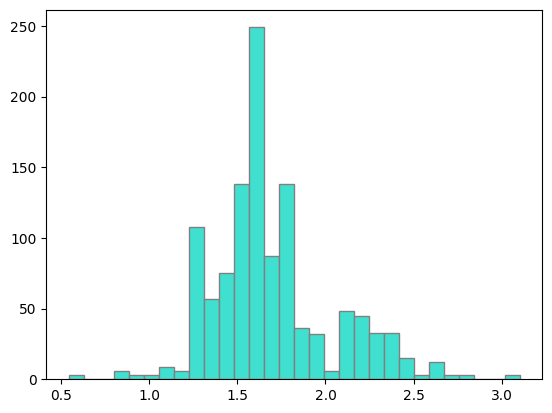

In [21]:
plt.hist(df["Weight (Kg)"], bins=30, color='turquoise', edgecolor='grey')
plt.show

## Dealing with 'Power Adapter' column

In [22]:
df[df['Power Adapter']=='Not Found'].value_counts().sum()

108

<function matplotlib.pyplot.show(close=None, block=None)>

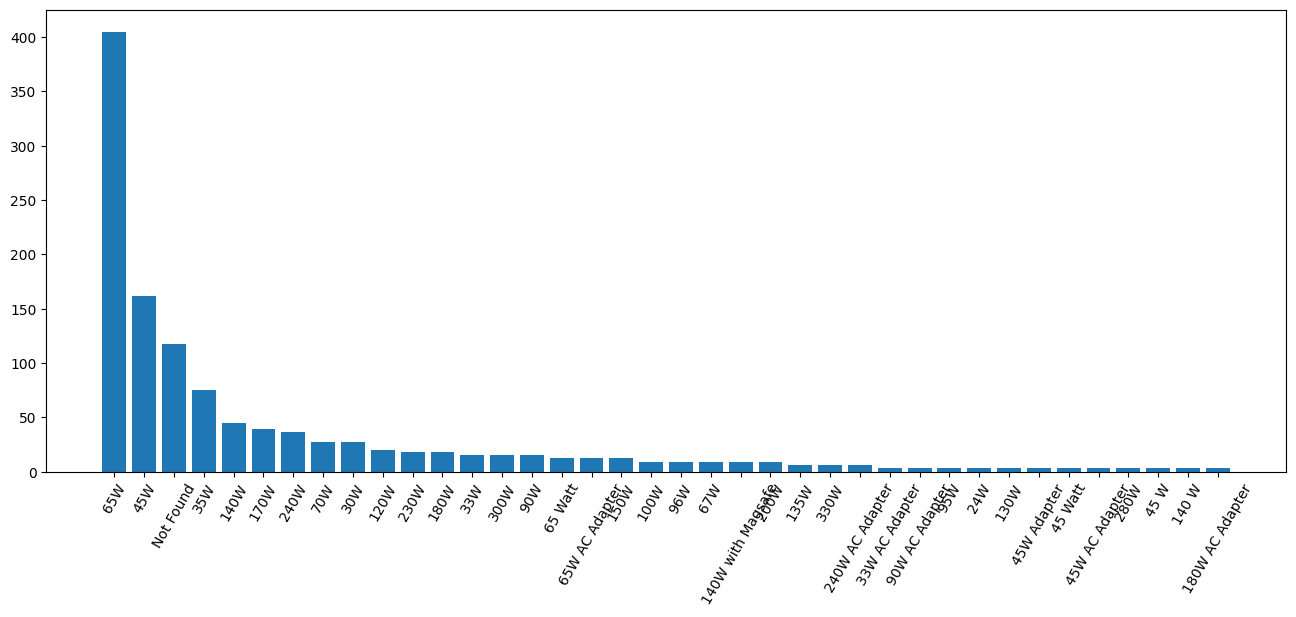

In [23]:
a=df['Power Adapter'].value_counts()
plt.figure(figsize=(16,6))
plt.bar(a.index,a.values)
plt.xticks(rotation=60)
plt.show

In [24]:
df['Power Adapter'].nunique()

38

In [25]:
def watt(n):
    if ' AC Adapter' in n:
        return n.replace(" AC Adapter","")
    elif ' Adapter' in n:
        return n.replace(" Adapter","")
    elif ' with Magsafe' in n:
        return n.replace(" with Magsafe","")
    elif " Watt" in n or "Watt" in n:
        return n.replace("Watt","").strip()+"W"
    elif " W" in n:
        return n.replace(" W","W")
    else:
        return n
        
df['Power Adapter']=df['Power Adapter'].apply(watt)

In [29]:
df.sample(2)

,Link,Brand,Model,Laptop Series,Part No,Processor Brand,Processor Model,Processor Core,RAM,RAM Type,Installed SSD Type,Graphics Chipset,Graphics Memory Accessibility,Graphics Memory,Display Size (Inch),Display Type,Display Resolution,Touch Screen,HDMI Port,LAN,Finger Print Sensor,Operating System,Color,Weight (Kg),Power Adapter,Warranty,Country Of Origin
914,https://www.ryans.com/apple-macbook-air-early-...,Apple,Apple MacBook Air (Early 2024),MacBook Air,MRYM3LL/A,Apple,Apple M3 Chip,8,8GB,Unmentioned,NVMe PCIe,Apple 10-Core GPU,Integrated,Shared,15.3,Liquid Retina,2880x1864,No,No,No,Yes,macOS,Space Gray,1.50,35W,1 Year,USA
327,https://www.ryans.com/lenovo-ideapad-slim-3-15...,Lenovo,Lenovo IdeaPad Slim 3 15ABR8,IdeaPad,82XM007WLK,AMD,Ryzen 5 7530U,6,8GB,DDR4,NVMe PCIe,AMD Radeon Graphics,Integrated,Shared,15.6,FHD LED Display,1920x1080,No,1,No,Yes,Win-11 Home,Abyss Blue,1.62,65W,2 Year,China


In [31]:
df.to_csv("final_ryans_laptop_inventory.csv")